## Neural Network Model

In [2]:
import numpy as np
import joblib
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [3]:
# Load Preprocessed Data
X_train = np.load(r"../data/processed/X_train.npy")
X_test  = np.load(r"../data/processed/X_test.npy")
y_train = np.load(r"../data/processed/y_train.npy")
y_test  = np.load(r"../data/processed/y_test.npy")

In [10]:
# Initialize Neural Network
nn_model = MLPClassifier(random_state=42, max_iter=1000)

In [11]:
# Hyperparameter Tuning 
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}
grid_search = GridSearchCV(nn_model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [6]:
# Train Final Model
best_nn = grid_search.best_estimator_
best_nn.fit(X_train, y_train)

,hidden_layer_sizes,"(100,)"
,activation,'tanh'
,solver,'sgd'
,alpha,0.001
,batch_size,'auto'
,learning_rate,'adaptive'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


In [7]:
# Evaluate Model
y_pred = best_nn.predict(X_test)
y_proba = best_nn.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.801277501774308

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[935 100]
 [180 194]]

ROC-AUC Score: 0.8410731354465371


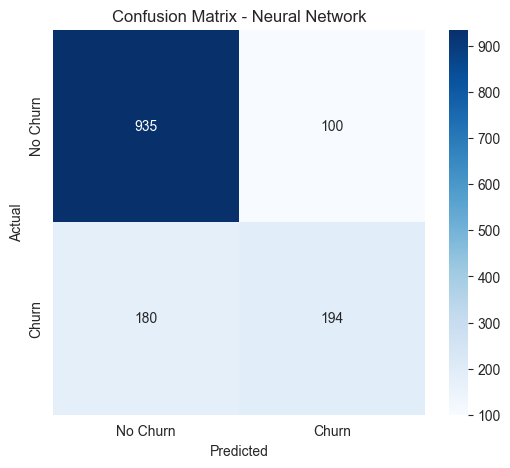

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Neural Network")
plt.show()


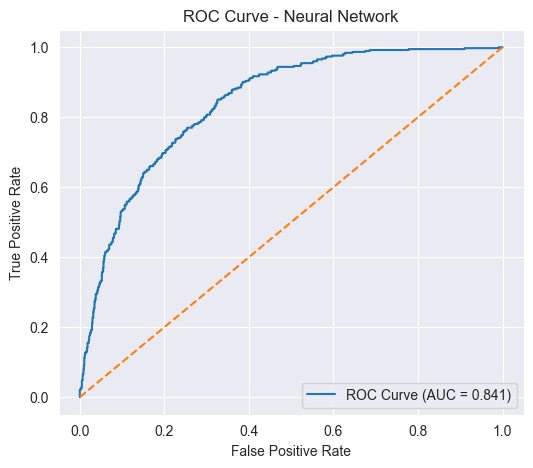

In [9]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [13]:
# Save Model
import os

models_path = os.path.abspath(os.path.join('..', 'models'))
os.makedirs(models_path, exist_ok=True)

joblib.dump(best_nn, os.path.join(models_path, 'neural_network_model.joblib'))
print("Neural Network model saved!")

Neural Network model saved!


In [14]:
# Save images
plt.savefig("../results/nn_confusion_matrix.png")
plt.savefig("../results/nn_roc_curve.png")


<Figure size 640x480 with 0 Axes>